In [2]:
import cv2
import numpy as np
import os

In [3]:
trainingDataset = []
classNumber = 0
img_size = 100
path = "Data/Train"

for folder in (os.listdir(path)):
  print(folder)

Pepper__bell___Bacterial_spot
Pepper__bell___healthy


In [4]:
trainingDataset.clear()
for folder in (os.listdir(path)):
  print(classNumber)
  print(folder)
  fp = os.path.join(path,folder)
  for eachImage in os.listdir(fp):
    imagePath = os.path.join(fp,eachImage)
    img = (cv2.imread(imagePath,cv2.IMREAD_GRAYSCALE))/255
    resized = cv2.resize(img , (img_size , img_size))
    trainingDataset.append([resized,classNumber])
  classNumber = classNumber + 1

print(len(trainingDataset))
print(len(trainingDataset[0]))
print(trainingDataset[0])

0
Pepper__bell___Bacterial_spot
1
Pepper__bell___healthy
2475
2
[array([[0.41325647, 0.4438698 , 0.38757647, ..., 0.59792941, 0.62037176,
        0.60517176],
       [0.41259137, 0.51110745, 0.4247451 , ..., 0.60369412, 0.61822275,
        0.60603608],
       [0.43287059, 0.44062745, 0.44141176, ..., 0.63466667, 0.6150902 ,
        0.63830588],
       ...,
       [0.57695686, 0.66974118, 0.65317647, ..., 0.62933333, 0.63523922,
        0.61460392],
       [0.6532251 , 0.70021961, 0.71689412, ..., 0.61330196, 0.6045051 ,
        0.62370353],
       [0.56021961, 0.59006118, 0.59592941, ..., 0.6414902 , 0.61784471,
        0.64073882]]), 0]


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import pickle
import time

In [6]:
X = []
Y = []
img_size = 100
np.random.shuffle(trainingDataset)
for features, label in trainingDataset:
    X.append(features)
    Y.append(label)
print(Y)  
print(len(Y))
print(len(X))

[1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 

In [7]:
X = np.array(X).reshape(-1, img_size, img_size, 1)
Y_binary = to_categorical(Y)
print(Y_binary)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [8]:
model = Sequential()

model.add(Conv2D(200, (3, 3), input_shape=(100,100,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(100, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(Activation('relu'))
 
model.add(Dense(2))
model.add(Activation('sigmoid'))


In [9]:

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

In [12]:

history = model.fit(X, Y_binary,
          batch_size = 32,
          epochs=10, validation_split = 0.1)
model.save("Data/Detection/Models/{NAME}.model")


Epoch 1/10
70/70 [==============================] - 130s 2s/step - loss: 0.3700 - accuracy: 0.8478 - val_loss: 0.3854 - val_accuracy: 0.8266
Epoch 2/10
70/70 [==============================] - 126s 2s/step - loss: 0.3181 - accuracy: 0.8702 - val_loss: 0.3834 - val_accuracy: 0.8387
Epoch 3/10
70/70 [==============================] - 126s 2s/step - loss: 0.2954 - accuracy: 0.8815 - val_loss: 0.3310 - val_accuracy: 0.8629
Epoch 4/10
70/70 [==============================] - 124s 2s/step - loss: 0.2949 - accuracy: 0.8828 - val_loss: 0.3559 - val_accuracy: 0.8387
Epoch 5/10
70/70 [==============================] - 128s 2s/step - loss: 0.2758 - accuracy: 0.8931 - val_loss: 0.3495 - val_accuracy: 0.8508
Epoch 6/10
70/70 [==============================] - 128s 2s/step - loss: 0.2650 - accuracy: 0.8927 - val_loss: 0.4195 - val_accuracy: 0.8468
Epoch 7/10
70/70 [==============================] - 127s 2s/step - loss: 0.2551 - accuracy: 0.9048 - val_loss: 0.3285 - val_accuracy: 0.8508
Epoch 8/10
70

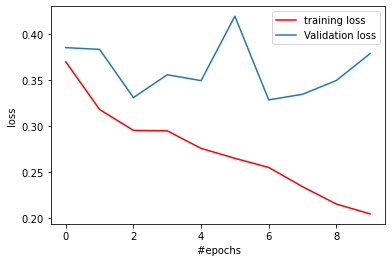

In [13]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'] , 'r' , label= 'training loss')
plt.plot(history.history['val_loss'] , label = 'Validation loss')

plt.xlabel(' #epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


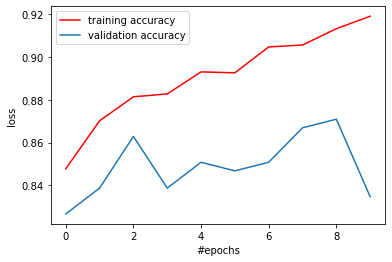

In [14]:
plt.plot(history.history['accuracy'] , 'r' , label = 'training accuracy')
plt.plot(history.history['val_accuracy']  ,label = 'validation accuracy')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:

def prepare(filepath):
    img_size = 100 
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)/255  
    img_resize = cv2.resize(img, (img_size, img_size))  
    return img_resize.reshape(-1, img_size, img_size, 1)

In [22]:
# prediction = model.predict(prepare("/content/drive/MyDrive/Dataset_ML/Pepper__bell___Bacterial_spot/1ade72cf-f7e0-4282-92d9-614bf05289a0___NREC_B.Spot 1975.JPG"))
prediction = model.predict(prepare("download.JFIF"))
print((prediction))

CATEGORIES = ["with baterial spot", "Healthy leaf"]

pred_class = CATEGORIES[np.argmax(prediction)]
print(pred_class)


[[0.4651441  0.27955794]]
with baterial spot
